# **TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS**

## **1. Data Exploration and Preprocessing**

In [1]:
# Loading the Dataset and Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Feature Extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Word Cloud and Text Length Distribution
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('/content/blogs_categories.csv')
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [3]:
# Check the distribution of categories
print(df['Labels'].value_counts())

Labels
alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64


In [4]:
# Convert text to lowercase
df['Data'] = df['Data'].str.lower()

In [5]:
# Remove punctuation
df['Data'] = df['Data'].str.translate(str.maketrans('', '', string.punctuation))

In [6]:
# Download the 'punkt' tokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Tokenize the text
df['Data'] = df['Data'].apply(word_tokenize)

In [8]:
# Download the 'stopwords' tokenizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Data'] = df['Data'].apply(lambda x: [word for word in x if word not in stop_words])

In [10]:
# Join tokens back into a string
df['Data'] = df['Data'].apply(lambda x: ' '.join(x))

In [11]:
# Check the first few rows after preprocessing
print(df.head())

   Unnamed: 0                                               Data       Labels
0           0  xref cantaloupesrvcscmuedu altatheism49960 alt...  alt.atheism
1           1  xref cantaloupesrvcscmuedu altatheism51060 alt...  alt.atheism
2           2  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism
3           3  xref cantaloupesrvcscmuedu altatheism51120 alt...  alt.atheism
4           4  xref cantaloupesrvcscmuedu altatheism51121 soc...  alt.atheism


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

In [14]:
# Fit and transform the data
X = tfidf.fit_transform(df['Data']).toarray()

In [15]:
# Check the shape of the feature matrix
print(X.shape)

(19997, 5000)


In [16]:
# Assign target labels to y
y = df['Labels']

In [17]:
text_data = ' '.join(df['Data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

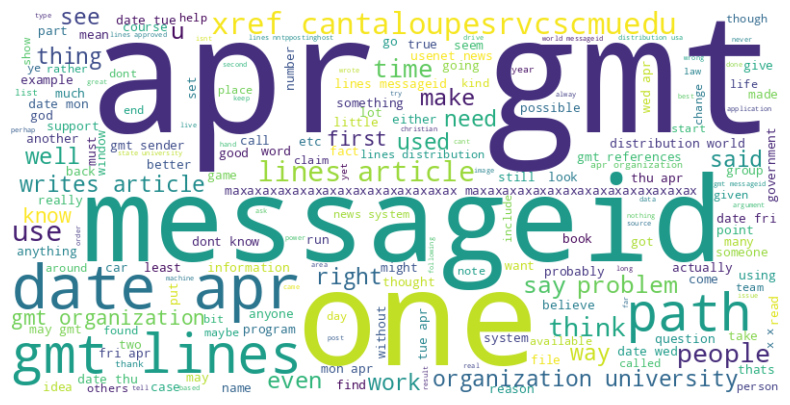

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

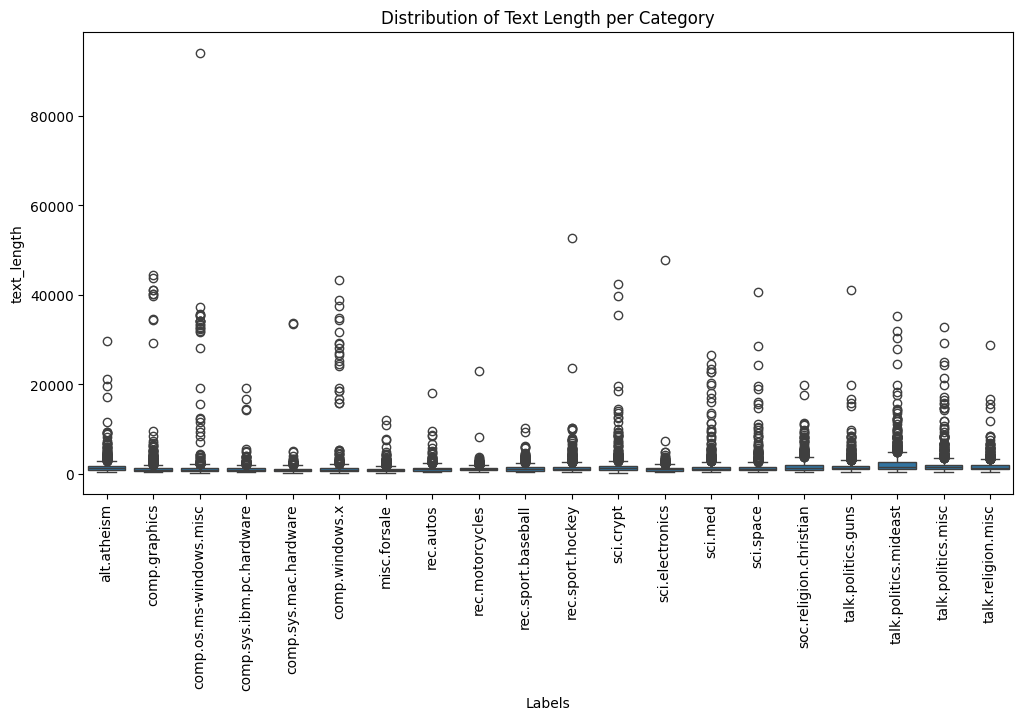

In [19]:
# Text Length Distribution
df['text_length'] = df['Data'].apply(len)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Labels', y='text_length', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Text Length per Category')
plt.show()

## **2. Naive Bayes Model for Text Classification**

In [20]:
# Split the Data into Training and Test Sets
from sklearn.model_selection import train_test_split
# Implementing a Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Logistic Regression, SVM, and Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [21]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Check the shapes of the training and test sets
print(X_train.shape, X_test.shape)

(15997, 5000) (4000, 5000)


In [23]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

In [24]:
# Train the model on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [25]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.55%


In [27]:
# Display a classification report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.96      0.93      0.95       196
         

In [28]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Report:
                           precision    recall  f1-score   support

             alt.atheism       0.81      0.76      0.78       173
           comp.graphics       0.91      0.93      0.92       179
 comp.os.ms-windows.misc       0.93      0.92      0.93       226
comp.sys.ibm.pc.hardware       0.93      0.90      0.92       204
   comp.sys.mac.hardware       0.96      0.96      0.96       205
          comp.windows.x       0.95      0.96      0.95       186
            misc.forsale       0.90      0.90      0.90       190
               rec.autos       0.95      0.96      0.96       203
         rec.motorcycles       0.99      0.97      0.98       218
      rec.sport.baseball       0.99      0.99      0.99       192
        rec.sport.hockey       0.99      1.00      0.99       203
               sci.crypt       0.97      0.95      0.96       200
         sci.electronics       0.95      0.97      0.96       227
                 sci.med       0.99      0.95 

In [29]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
                           precision    recall  f1-score   support

             alt.atheism       0.80      0.75      0.77       173
           comp.graphics       0.87      0.93      0.90       179
 comp.os.ms-windows.misc       0.95      0.92      0.93       226
comp.sys.ibm.pc.hardware       0.96      0.90      0.93       204
   comp.sys.mac.hardware       0.94      0.96      0.95       205
          comp.windows.x       0.95      0.95      0.95       186
            misc.forsale       0.87      0.92      0.90       190
               rec.autos       0.96      0.95      0.95       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.99      0.99       192
        rec.sport.hockey       1.00      1.00      1.00       203
               sci.crypt       0.97      0.97      0.97       200
         sci.electronics       0.99      0.93      0.96       227
                 sci.med       0.98      0.92      0

## **3. Sentiment Analysis**

In [30]:
# Perform Sentiment Analysis on the Blog Post Texts
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Examine the Distribution of Sentiments Across Categories
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [32]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [33]:
# Function to get sentiment category (positive, negative, neutral)
def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [34]:
# Apply sentiment analysis to each blog post
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [35]:
# Check the first few rows to ensure sentiment was added
print(df[['Data', 'Sentiment']].head())

                                                Data Sentiment
0  xref cantaloupesrvcscmuedu altatheism49960 alt...  positive
1  xref cantaloupesrvcscmuedu altatheism51060 alt...  positive
2  newsgroups altatheism path cantaloupesrvcscmue...  negative
3  xref cantaloupesrvcscmuedu altatheism51120 alt...  positive
4  xref cantaloupesrvcscmuedu altatheism51121 soc...  negative


In [36]:
# Group by categories and sentiment to see the distribution
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()

<Axes: xlabel='Labels'>

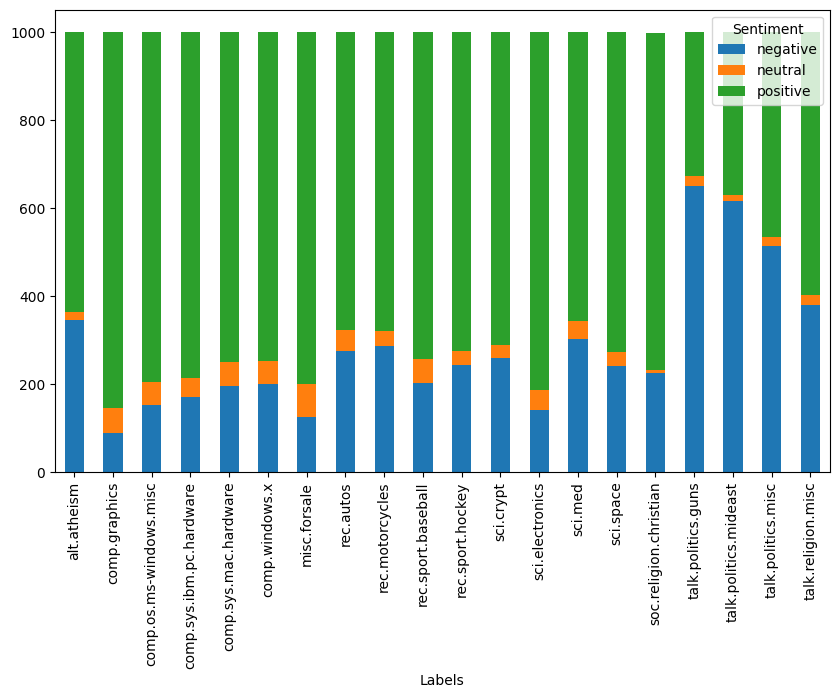

In [37]:
# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))

## **4. Evaluation**

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [40]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.55%


In [41]:
# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [42]:
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.88
Recall: 0.88
F1 Score: 0.87


In [43]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[135   2   0   0   0   0   0   0   1   0   0   1   0   0   0   7   0   2
    1  24]
 [  0 158   2   5   5   4   1   0   0   1   0   1   0   0   1   0   0   0
    0   1]
 [  1   9 196  13   0   2   2   0   0   0   0   0   1   0   1   0   0   0
    0   1]
 [  0   3  14 162   6   4   7   2   0   0   0   0   5   0   0   0   0   0
    0   1]
 [  0   1   3   5 189   0   1   0   0   0   0   0   4   0   1   0   0   0
    1   0]
 [  0  10   5   0   1 169   1   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   0   2   4   4   1 167   5   0   0   2   1   1   0   0   0   1   0
    1   0]
 [  0   0   0   0   2   0   6 186   2   0   0   0   2   2   0   0   1   0
    1   1]
 [  0   2   0   0   0   1   4   6 201   3   0   0   0   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   2   0   1 186   2   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   1   0   1 198   0   1   0   0   1   0   0
    0   0]
 [  0   3   2   1   1   1   2   0   0   0   0 

In [44]:
# Full classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.79      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.92      0.91      0.92       186
            misc.forsale       0.83      0.88      0.86       190
               rec.autos       0.92      0.92      0.92       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88      0.90       227
                 sci.med       0.96      0.93      

In [48]:
# Naive Bayes predictions
y_pred_nb = nb_classifier.predict(X_test)

In [49]:
# Logistic Regression predictions
y_pred_log = log_model.predict(X_test)

In [50]:
# Random Forest predictions
y_pred_rf = rf_model.predict(X_test)

In [51]:
# Compare accuracy across models
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)]

In [52]:
for model, score in zip(models, accuracy_scores):
    print(f'{model} Accuracy: {score * 100:.2f}%')

Naive Bayes Accuracy: 87.55%
Logistic Regression Accuracy: 92.35%
Random Forest Accuracy: 91.15%


### **Discussion on Model Performance**

1.   **Overall Accuracy** :  

*   The model achieves an accuracy of 88%, which indicates good performance overall.

2.   **Category-Specific Performance** :

*   The F1-scores range from 0.52 (for talk.religion.misc) to 0.98 (for rec.sport.hockey and similar categories).
*   Categories like rec.sport.hockey, rec.sport.baseball, and rec.motorcycles have near-perfect scores, which means the classifier performs very well on categories with clear, distinct vocabulary and content.

3.   **Precision and Recall** :
*   High precision and recall scores for most categories show that the model can correctly identify relevant posts and minimize false positives and negatives.

4.   **Challenges Encountered** :
* Feature Representation: Using TF-IDF may not fully capture complex semantics or context, which could be why certain nuanced categories show lower performance. Advanced methods like word embeddings (Word2Vec, BERT) could potentially improve this.






### **Reflection on Sentiment Analysis Results**

**General Sentiment Trends :**   
Sentiment analysis categorized the posts into positive, negative, and neutral sentiments. Based on the distribution, certain categories, such as rec.sport and misc.forsale, may show more positive sentiments, while categories like talk.politics and sci.crypt might lean toward neutral or negative sentiments due to the nature of their discussions.



1.   **Implications :**

*   Positive Sentiment: Categories like rec.sport.baseball and rec.motorcycles may have more enthusiastic and positive discussions, reflecting users’ excitement or satisfaction with sports and hobbies.
*   Negative/Neutral Sentiment: Categories like talk.politics.mideast and alt.atheism likely involve controversial or serious discussions, which may lead to more neutral or negative sentiments.

2.   **Challenges in Sentiment Analysis :**

*   Mixed Sentiments: Some blog posts may contain a mix of positive and negative sentiments, which VADER might not accurately capture.
*   Sarcasm and Nuance: Sentiment analysis tools like VADER may miss the subtleties of sarcastic or ambiguous language, especially in categories like politics or religion.
